# Lesson 6 Assignment - Advertising Sales Regression

## Author - Ana Javed



### Instructions  
Perform four different linear regressions on advertising sales data located in 'Advertising.csv'.  Your dependent feature is 'sales', a measure of sales of a product in a given market in thousands of dollars. 

The independent features for each of the first 3 separate regressions are:

 1. 'TV': advertising dollars spent on TV ads for a single product in a given market
 2. 'radio': advertising dollars spent on radio ads
 3. 'newspaper': advertising dollars spent on newspaper ads

For the first 3 linear regression performed:

- Produce a labeled graph showing the best fit line with the data points.
- Interpret both the slope and y-intercept.
 
The final regression(#4) includes all 3 features: (a) TV, (b) radio, and (c) newspaper. 
- Interpret each partial slope and the intercept parameters.
- Interpret the adjusted R-squared.
- Find and report the mean-squared error.

#### Please prepare this information for a client who may not understand what the parameters mean.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
import statsmodels.formula.api as sm
import seaborn as sns

%matplotlib inline

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Advertising.csv'
ad_data = pd.read_csv(filename, index_col=0)
print(ad_data.head())
print(ad_data.shape)
ad_data.describe()

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
(200, 4)


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Intercept: 7.03259
Slope : 0.04754


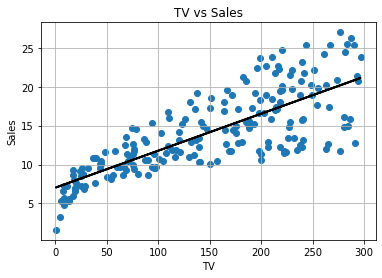

In [3]:
## First Independent Feature: TV (Advertisting Dollars spent on TV ads) 
## Dependent Feature = Sales

# First initialize the model.
from sklearn import linear_model
linear_model = linear_model.LinearRegression()


# Fit the model to the data
x_input = ad_data['TV'].values.reshape(len(ad_data['TV']), 1)
y_output = ad_data['sales'].values.reshape(len(ad_data['sales']), 1)

linear_model.fit(x_input, y_output)


# Get predictions
y_pred = linear_model.predict(x_input)

# Plot output
plt.scatter(x_input, y_output)
plt.plot(x_input, y_pred, linewidth=2, color = 'black')
plt.grid(True)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')

# Print model parameters
# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(linear_model.intercept_[0]))
print('Slope : {0:.5f}'.format(linear_model.coef_[0][0]))

Intercept: 9.31164
Slope : 0.20250


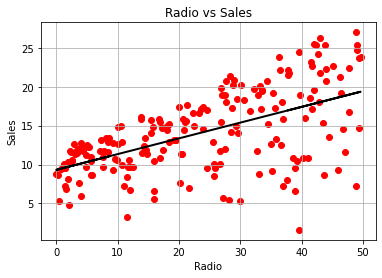

In [4]:
## Second Independent Feature: Radio  (Advertisting Dollars spent on Radio Ads)
## Dependent Feature = Sales

# First initialize the model.
from sklearn import linear_model
linear_model = linear_model.LinearRegression()


# Fit the model to the data
x_input = ad_data['radio'].values.reshape(len(ad_data['radio']), 1)
y_output = ad_data['sales'].values.reshape(len(ad_data['sales']), 1)

linear_model.fit(x_input, y_output)


# Get predictions
y_pred = linear_model.predict(x_input)

# Plot output
plt.scatter(x_input, y_output, color = 'red')
plt.plot(x_input, y_pred, linewidth=2, color = 'black')
plt.grid(True)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio vs Sales')

# Print model parameters
# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(linear_model.intercept_[0]))
print('Slope : {0:.5f}'.format(linear_model.coef_[0][0]))

Intercept: 12.35141
Slope : 0.05469


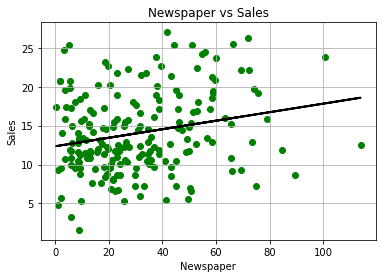

In [5]:
## Third Independent Feature: Newspaper (Advertisting Dollars spent on Newspaper Ads)
## Dependent Feature = Sales

# First initialize the model.
from sklearn import linear_model
linear_model = linear_model.LinearRegression()


# Fit the model to the data
x_input = ad_data['newspaper'].values.reshape(len(ad_data['newspaper']), 1)
y_output = ad_data['sales'].values.reshape(len(ad_data['sales']), 1)

linear_model.fit(x_input, y_output)


# Get predictions
y_pred = linear_model.predict(x_input)

# Plot output
plt.scatter(x_input, y_output, color = 'green')
plt.plot(x_input, y_pred, linewidth=2, color='black')
plt.grid(True)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Newspaper vs Sales')

# Print model parameters
# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(linear_model.intercept_[0]))
print('Slope : {0:.5f}'.format(linear_model.coef_[0][0]))


### Interpretation of the Intercept & Slope for TV, Radio, and Newspaper Ads in relation to Sales 

For TV, the slope is small but positive, which means that as TV ad spending increased, the Sales increased at a rate of 0.047. The y-intercept is 7.03, which means that if TV ad spending was 0, then sales would be about 7.03. 

For Radio, the slope is slightly bigger than TV and positive. This means that as radio ad spending increased, sales increased at a rate of 0.20. The y-intercept is also higher than TV, and it is 9.31. This means that if Radio ad spending was 0, then sales would be at 9.311. 

For Newspaper, the slope is 0.055. This means that as newspaper ads spending increased, sales increased at this rate. The y-intercept is the highest out of all three, and sits at 12.35. This means that if newspaper spending was 0, then sales would be at 12.35. 

In [7]:
## Regression for All 3 Features: TV, Radio, and Newspaper

## Separating the independent variables vs dependent variables 
x = ad_data[['TV','radio', 'newspaper']]
y = ad_data['sales']

# Scalining the data via sklearn 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [21]:
# Conducting Multivariant Regression with statsmodels
import statsmodels.api as sm 
X = sm.add_constant(x) # adding a constant variable 

# Fitting the model 
model = sm.OLS(y, X).fit()  
print_model = model.summary()

# Printing the Mean-Squared Error (RMSE)
print('RMSE: {}'.format(np.sqrt(model.mse_model)))
print('SSR: {}'.format(model.ssr))

# Printing the model Summary 
print(print_model)


RMSE: 40.250563089633964
SSR: 556.8252629021873
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           1.58e-96
Time:                        21:15:28   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

### Interpretation of the Multivariant Linear Regression Model 

The partial slope for TV (or x1) is 3.92, which means if all other predictors are held constant, if the TV ads sales increased, average sales would increase by 3.92. The partial slope for radio (or x2) is 2.79, so if all predictors are held constant - if radio ads increased, average sales would increase by 2.79. This is smaller than TV. Finally, for newspaper (or x3) the partial slope is -0.022. This suggests that for each newspaper ad purchased, the sales would decrease by -0.022. The constant for the equation is 14.022. 

The adjusted r-squared is 0.896, which suggests the model can account for 89.6% of the variations seen in the sample data provided to the model. 

Lastly, the mean-squared error, or average measure of errors of the model, is 40.25. This is quite large and can suggest that our model has large errors.  